In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from matplotlib.ticker import FormatStrFormatter

In [2]:
DoscarIn = !cat /home/nadamski/ScN_DOS/DOSCAR
vecs = np.array([map(float, DoscarIn[i].split()) for i in range(6,2005)])
x = np.array([i[0] for i in vecs])
y = [i[1] for i in vecs]
z = np.array([i[3] for i in vecs])
fig = plt.figure()
ax = plt.subplot(111)


plt.plot(x[1000:1600]-5,y[1000:1600])

plt.xlabel(r'E - $\rm E_v$ (eV)', fontsize=16)
ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=16)
plt.ylabel('Density of States (a.u.)', fontsize=16)
ax.set_yticklabels([], fontsize=16)

plt.savefig('ScNDOS.png', bbox_inches='tight', format='png', dpi=300)

#plt.plot(x[1000:]- 5,z[1000:])
plt.show()

IndexError: list index out of range

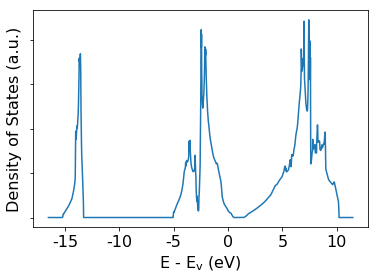

In [3]:
DoscarIn = !cat /home/nadamski/ScN_DOS/DOSnsv
vecs = np.array([map(float, DoscarIn[i].split()) for i in range(6,2005)])
x = np.array([i[0] for i in vecs])
y = np.array([i[1] for i in vecs])
z = np.array([i[3] for i in vecs])
fig = plt.figure()
ax = plt.subplot(111)


plt.plot(x[0:2000]-5,y[0:2000])

plt.xlabel(r'E - $\rm E_v$ (eV)', fontsize=16)
ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=16)
plt.ylabel('Density of States (a.u.)', fontsize=16)
ax.set_yticklabels([], fontsize=16)

plt.savefig('ScNDOS.png', bbox_inches='tight', format='png', dpi=300)

#plt.plot(x[1000:]- 5,z[1000:])
plt.show()

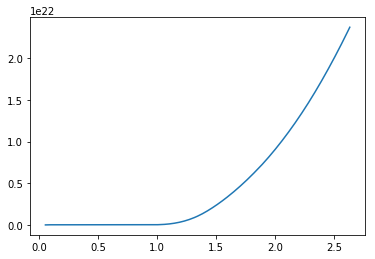

In [127]:
#plt.plot(x[1215:1400]-5.444,(z[1215:1400]-4)/5.014472857918019e-24)
plt.plot(x[1215:1400]-5.444,np.cumsum(y[1215:1400])/5.014472857918019e-24*0.014006)

In [38]:
x[1001]-x[1]

IndexError: index 1001 is out of bounds for axis 0 with size 11

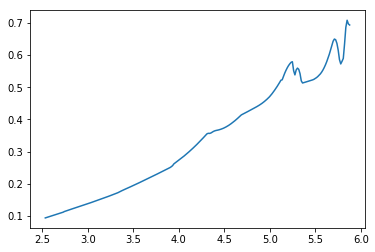

In [126]:
plt.plot(x[1360:1600]-5,y[1360:1600])


In [ ]:
DOS = (z[1360:1400]-8)//22.72945462e-24
Ei = x[1360:1400]-5
def f(Ef):
    f = 1/(np.exp((Ei-Ef)/(0.026))+1)
    return f
def n(Ef):
    n = sum(DOS*f(Ef))
    return n

In [40]:
n(1.4)

-53490.65863016919

In [41]:
1e15

1000000000000000.0

In [42]:
(x[1998]-x[100])/1898

IndexError: index 1998 is out of bounds for axis 0 with size 11

In [43]:
np.exp(np.array([2,3]))

array([ 7.3890561 , 20.08553692])

In [44]:
x[2]-x[1]

0.09315487816657281

In [45]:
GX = !cat ~/remote/cori/work/copyscratch/ScN/ScN_rs/bandstr/GX1/EIGENVAL
XW = !cat ~/remote/cori/work/copyscratch/ScN/ScN_rs/bandstr/XW2/EIGENVAL

info = np.array(map(int, GX[5].split()))
elect = info[0];
kpts = info[1];
bands = info[2];

path = [GX, XW]
band = [[] for i in range(bands)]

for k in path:
    info = np.array(map(int, k[5].split()))
    elect = info[0];
    kpts = info[1];
    bands = info[2];
    vals = np.zeros([bands,kpts])
    for i in range(bands):
        for j in range(28,44):
            vals[i][j] = float(k[8 + (i + (bands+2)*j)].split()[1])
        if k == GX: 
            band[i] += list(vals[i][28:])
        else: 
            band[i] += list(vals[i][29:])

In [46]:
band[8][6] - band[8][15]

1.6504979999999998

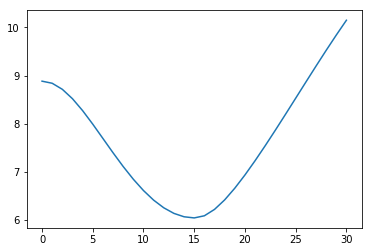

In [47]:
plt.plot(band[8])

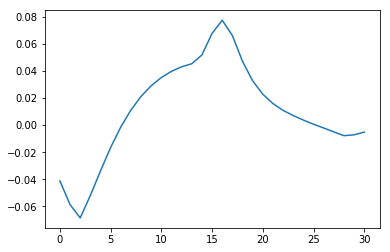

In [48]:
plt.plot(np.gradient(np.gradient(band[8])))

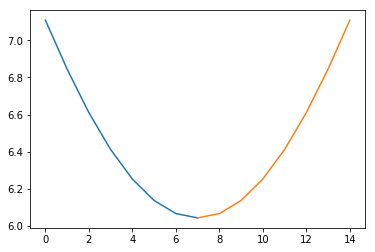

In [49]:
plt.plot(range(0,8),band[8][8:16])
plt.plot(range(14,6,-1),band[8][8:16])

[ 6.05485548e+00 -1.61544970e-15  2.55141527e+00  3.20607168e-14
  2.28898940e-01 -1.18597145e-13 -9.55273841e-01]
1.493270916384244


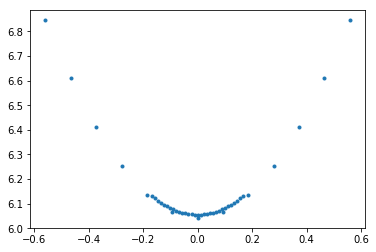

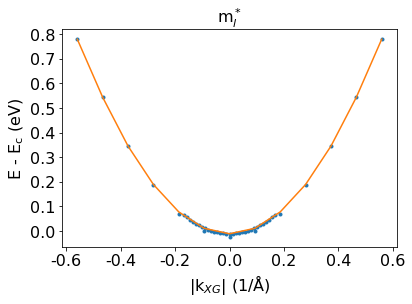

In [60]:
loc = 7
GX_para = [band[8][i] for i in range(16-loc,16)]+[band[8][i] for i in range(14,15-loc,-1)]
GXh_par = [bandz[8][i] for i in range(0,16)]+[bandz[8][i] for i in range(14,-1,-1)]
x = np.array(range(-loc+1,loc)) * 0.22239089 /15.0 * 2*np.pi
xh = np.array(range(-15,16)) * 0.22239089 /125.0 * 2*np.pi

xall = np.concatenate((x,xh),axis=None)
GXall = GX_para + GXh_par
plt.plot(xall,GXall,'.')
exp = poly.polyfit(xall,GXall,6)
r = sum(x**i*exp[i] for i in range(len(exp)))
print exp
k2 = lambda E: sum(i*(i-1)*exp[i]*E**(i-2) for i in range(len(exp)))
me_l = 1.0/(k2(0.02000000000001))/1.6e-19*1e20*1.054e-34**2/9.11e-31

mlexp = exp
fig = plt.figure()
ax = plt.subplot(111)

plt.plot(xall,GXall-GXall[loc],'.')
plt.plot(x,r-GXall[loc])

plt.title(r'm$^*_l$', fontsize=16)

plt.ylabel(r'E - $\rm E_c$ (eV)', fontsize=16)
plt.xlabel(r'|k$_{XG}$| (1/$\rm \AA$)', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.savefig('ScN_GX.png', bbox_inches='tight', format='png', dpi=300)
print me_l

In [19]:
exp[2]*1e-20*1.6e-19*2/1.054e-34**2*9.11e-31

NameError: name 'exp' is not defined

In [20]:
# 0.3 0 0.3
# 0.5 0 0.5



-0.222390893 -0.222390893 -0.222390893
0.222390893  0.222390893 -0.222390893
0.222390893 -0.222390893  0.222390893



SyntaxError: invalid syntax (<ipython-input-20-27ba826b4e4b>, line 8)

In [21]:
a1 = np.array([ 0.000000000, -2.248293508 ,-2.248293508])
k1 = np.array([-0.222390893, -0.222390893 ,-0.222390893])
k2 = np.array([0.222390893, 0.222390893 ,-0.222390893])
k3 = np.array([0.222390893, -0.222390893 ,0.222390893])

np.dot(a1,k1)

1.0000000019404454

In [22]:
a1 = np.array([ 0.000000000,2.248293508, 2.248293508])
a2 = np.array([ 2.248293508,0 ,2.248293508])
a3 = np.array([ 2.248293508 ,2.248293508,0.000000000,])
np.norm(a1+a2+a3)

AttributeError: 'module' object has no attribute 'norm'

In [23]:
vk = 0.2 * k1 + 0.2 * k3
dk_xg = 0.22239089 /15.0 * 2*np.pi
dk_xw = 0.11119545 /15.0 * 2*np.pi

In [24]:
-0.22239089 - -0.13343454

-0.08895635000000002

[ 6.05680114e+00 -4.87483542e-15  2.06668586e+01  3.47692705e-13
 -9.34759522e+01 -3.17205474e-12  2.78449189e+02]
0.18439043873713726


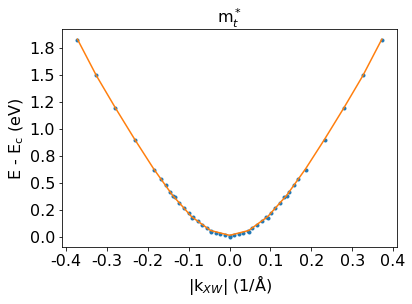

In [59]:
loc = 8
XW_para = np.array([band[8][i] for i in range(15+loc,15,-1)]+[band[8][i] for i in range(15,16+loc)])
XWh_par = [bandz[8][i] for i in range(31,16,-1)] + [bandz[8][i] for i in range(16,32)]
x = np.array(range(-loc,loc+1)) * 0.11119545 /15.0 * 2*np.pi
xh = np.array(range(-15,16)) * 0.22239089 /125.0 * 2*np.pi

xall = np.concatenate((x,xh),axis=None)
XWall = np.concatenate((XW_para,XWh_par),axis=None)
exp = poly.polyfit(xall,XWall,6)
print exp
r = sum(x**i*exp[i] for i in range(len(exp)))

mtexp = exp

fig = plt.figure()
ax = plt.subplot(111)

plt.plot(xall,XWall-XWall[loc],'.')
plt.plot(x,r-XWall[loc])



plt.ylabel(r'E - $\rm E_c$ (eV)', fontsize=16)
plt.xlabel(r'|k$_{XW}$| (1/$\rm \AA$)', fontsize=16)
plt.title(r'm$^*_t$', fontsize=16)
ax.set_yticklabels(ax.get_yticks(), fontsize=16)
ax.set_xticklabels(ax.get_xticks(), fontsize=16)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.savefig('ScN_GX.png', bbox_inches='tight', format='png', dpi=300)



k2 = lambda E: sum(i*(i-1)*exp[i]*E**(i-2) for i in range(len(exp)))
me_t = 1.0/(k2(0.000001))/1.6e-19*1e20*1.054e-34**2/9.11e-31
print me_t

In [61]:
me_DOS = (me_t*me_t*me_l)**(1.0/3.0)
me_DOS

0.3702870018672307

In [62]:
me_c = 3/(1/me_t + 1/me_t + 1/me_l)
me_c

0.26050213866103

In [64]:
me_l

1.493270916384244

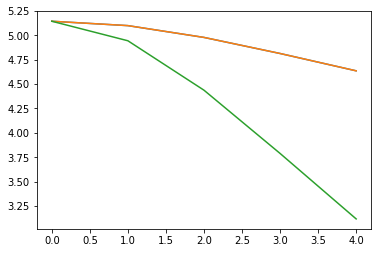

In [29]:
l = 5
plt.plot(range(0,l),band[7][0:l])
plt.plot(range(0,l),band[6][0:l])
plt.plot(range(0,l),band[5][0:l])


[ 5.14152114e+00  5.65322000e-16 -4.72106104e+00]
0.8071853116013301


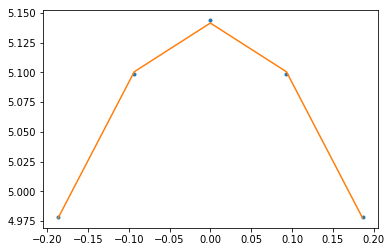

In [30]:
loc = 2
GX_hole1 = np.array([band[7][i] for i in range(loc,0,-1)]+[band[7][i] for i in range(0,loc+1)])
x = np.array(range(-loc,loc+1)) * 0.22239089 /15.0 * 2*np.pi

exp = poly.polyfit(x,GX_hole1,2)
print exp
r = x**2*exp[2] +  x**1*exp[1] +  x**0*exp[0] 
plt.plot(x,GX_hole1,'.')
plt.plot(x,r)
mh_1 = -1.0/(2*exp[2])/1.6e-19*1e20*1.054e-34**2/9.11e-31
print mh_1

[ 5.14151834e+00 -6.97230467e-15 -4.72106104e+00]
0.8071853116013447


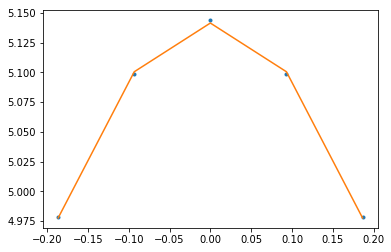

In [31]:
loc = 2
GX_hole2 = np.array([band[6][i] for i in range(loc,0,-1)]+[band[6][i] for i in range(0,loc+1)])
x = np.array(range(-loc,loc+1)) * 0.22239089 /15.0 * 2*np.pi

exp = poly.polyfit(x,GX_hole2,2)
print exp
r = x**2*exp[2] +  x**1*exp[1] +  x**0*exp[0] 
plt.plot(x,GX_hole2,'.')
plt.plot(x,r)
mh_2 = -1.0/(2*exp[2])/1.6e-19*1e20*1.054e-34**2/9.11e-31
print mh_2

[ 5.13452931e+00 -1.36360797e-15 -2.22782179e+01 -1.43907166e-14
  7.27489125e+01 -2.94349734e-14 -1.20668225e+02]
0.1710536786736876


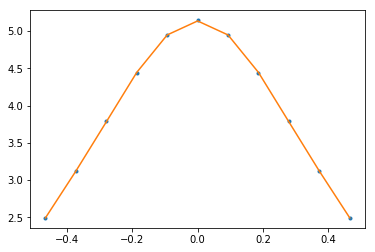

In [65]:
loc = 5
GX_hole3 = np.array([band[5][i] for i in range(loc,0,-1)]+[band[5][i] for i in range(0,loc+1)])
x = np.array(range(-loc,loc+1)) * 0.22239089 /15.0 * 2*np.pi

exp = poly.polyfit(x,GX_hole3,6)
print exp
r = sum(x**i*exp[i] for i in range(len(exp)))
plt.plot(x,GX_hole3,'.')
plt.plot(x,r)
mh_2 = -1.0/(2*exp[2])/1.6e-19*1e20*1.054e-34**2/9.11e-31
print mh_2

In [66]:
#PBE Sc-Sc bond lengths:
a_Sc = 3.45474
c_Sc = 5.6415733333333336

#PBE Sc-Sc bond lengths
ar_Sc = 3.178342733079512
cr_Sc = 5.505

#PBE Al-Al bond lengths:
a_Al = 3.1279602097493218
c_Al = 5.0144837000582232


In [67]:
a_25 = (0.75*a_Al + 0.25*a_Sc)
c_25 = (0.75*c_Al + 0.25*c_Sc)

final25 = [5.0249174294300785, 5.5886636152816154, 6.5312340734480951]
[c_25, a_25*3**0.5, a_25*2]

[5.171256108377001, 5.5592858072398466, 6.419310314623983]

In [68]:
2.2474276994955078 * 2**0.5

3.178342733079512

In [69]:
6.5312340734480951 * 8

52.24987258758476

In [70]:
24.45410 + 2.69056 - 5.0249174294300785 * 5

2.0200728528496086

In [71]:
from pymatgen.electronic_structure import plotter

/home/nadamski/Documents/Jupyter/virtenv/local/lib/python2.7/site-packages/pymatgen/__init__.py:89: UserWarning: 
Pymatgen will drop Py2k support from v2019.1.1. Pls consult the documentation
at https://www.pymatgen.org for more details.
  at https://www.pymatgen.org for more details.""")


In [72]:
sum(i for i in range(3))

3

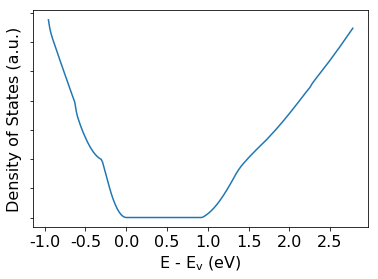

In [73]:
DoscarIn = !cat /home/nadamski/ScN_DOS/DOSnew
vecs = np.array([map(float, DoscarIn[i].split()) for i in range(6,4005)])
x = np.array([i[0] for i in vecs])
y = [i[1] for i in vecs]
z = np.array([i[3] for i in vecs])
fig = plt.figure()
ax = plt.subplot(111)


plt.plot(x[3180:3400]-5.149,y[3180:3400])

plt.xlabel(r'E - $\rm E_v$ (eV)', fontsize=16)
ax.set_xticklabels(ax.get_xticks(), fontsize=16)
plt.ylabel('Density of States (a.u.)', fontsize=16)
ax.set_yticklabels([], fontsize=16)

plt.savefig('ScNDOS.png', bbox_inches='tight', format='png', dpi=300)

#plt.plot(x[1000:]- 5,z[1000:])
plt.show()

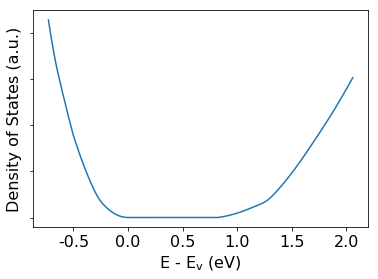

In [91]:
DoscarIn = !cat /home/nadamski/ScN_DOS/DOSnsv
vecs = np.array([map(float, DoscarIn[i].split()) for i in range(6,4005)])
x = np.array([i[0] for i in vecs])
y = [i[1] for i in vecs]
z = np.array([i[3] for i in vecs])
fig = plt.figure()
ax = plt.subplot(111)


plt.plot(x[3170:3370]-5.584,y[3170:3370])

plt.xlabel(r'E - $\rm E_v$ (eV)', fontsize=16)
ax.set_xticklabels(ax.get_xticks(), fontsize=16)
plt.ylabel('Density of States (a.u.)', fontsize=16)
ax.set_yticklabels([], fontsize=16)

plt.savefig('ScNDOS.png', bbox_inches='tight', format='png', dpi=300)

#plt.plot(x[1000:]- 5,z[1000:])
plt.show()

In [92]:
GXh = !cat /home/nadamski/ScN_DOS/GXhigh
XWh = !cat /home/nadamski/ScN_DOS/XWhigh

info = np.array(map(int, GX[5].split()))
elect = info[0];
kpts = info[1];
bands = info[2];

path = [GXh, XWh]
bandz = [[] for i in range(bands)]

for k in path:
    info = np.array(map(int, k[5].split()))
    elect = info[0];
    kpts = info[1];
    bands = info[2];
    vals = np.zeros([bands,kpts])
    for i in range(bands):
        for j in range(28,44):
            vals[i][j] = float(k[8 + (i + (bands+2)*j)].split()[1])
        if k == GX: 
            bandz[i] += list(vals[i][28:])
        else: 
            bandz[i] += list(vals[i][28:])

In [93]:
bandz[8][0:16]

[6.131375,
 6.12157,
 6.112429,
 6.103956,
 6.096152,
 6.089021,
 6.082563,
 6.076781,
 6.071676,
 6.067248,
 6.0635,
 6.060433,
 6.058046,
 6.05634,
 6.055317,
 6.054976]

In [143]:
DOS = np.cumsum(y[1215:1400])/5.014472857918019e-24*0.014006
eDOS = np.array(x[1215:1400])-5.444


k1 = lambda E: sum(i*(i-1)*mlexp[i]*E**(i-2) for i in range(len(exp)))
me_l = lambda k: 1.0/(k1(k))/1.6e-19*1e20*1.054e-34**2/9.11e-31
E_l = lambda k: sum(k**i*mlexp[i] for i in range(1,len(exp)))


k2 = lambda E: sum(i*(i-1)*mtexp[i]*E**(i-2) for i in range(len(exp)))
me_t = lambda k: 1.0/(k2(k))/1.6e-19*1e20*1.054e-34**2/9.11e-31
E_t = lambda k: sum(k**i*mtexp[i] for i in range(1,len(exp)))

n = lambda E: [sum(DOS * (eDOS < i)) for i in E]
nT = lambda E: [sum(DOS * 1/(np.exp((eDOS - i)/0.026)+1)) for i in E]



In [173]:
k1r = np.arange(0.0001, 0.501, 0.001)
k2r = np.arange(0.0001, 0.501, 0.001)

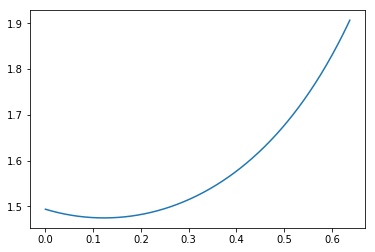

In [176]:
plt.plot(E_l(k1r), me_l(k1r))


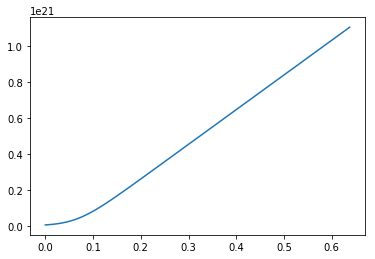

In [101]:
plt.plot(E_l(k1r), nT(E_l(k1r)))

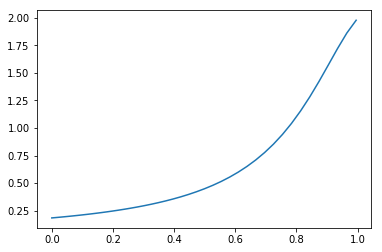

In [102]:
plt.plot(E_t(k2r), me_t(k2r))

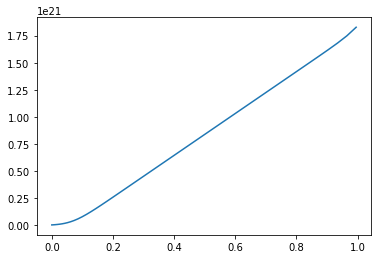

In [103]:
plt.plot(E_t(k2r), nT(E_t(k2r)))

In [104]:
def n(E): 
    return [sum(DOS * (eDOS < i)) for i in E]


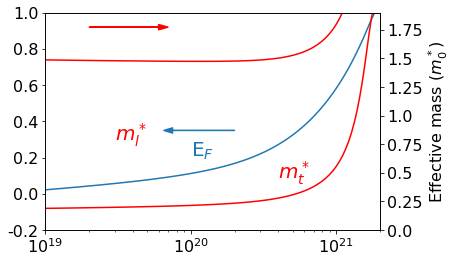

In [172]:
fig, ax2 = plt.subplots()
ax1 = ax2.twinx()


En = np.arange(-0.1, 1, 0.01)
ax2.semilogx(nT(En), En)
plt.ylabel(r'E - $\rm E_c$ (eV)', fontsize=16)

ax2.set_ylim(-0.2, 1)

ax2.set_yticklabels(ax2.get_yticks(), fontsize=16)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax2.set_xticklabels(ax1.get_xticks(), fontsize=16)

plt.xlabel(r'Doping concentration ($\rm cm^{-3}$)', fontsize=16)

plt.text(3e19, 0.78, r'$m^*_l$', color='r', fontsize=20)
ax2.arrow(2e19, 0.92,  5e19, 0,lw=1.3, head_width=0.03, head_length=1e19, length_includes_head=True,fc='r', ec='r')
ax2.arrow(2.0e20, 0.35,  -1.35e20, 0,lw=1.3, head_width=0.03, head_length=1e19, length_includes_head=True,fc='C0', ec='C0')




ax1.semilogx(nT(E_l(k1r)),me_l(k1r),'r')
ax1.semilogx([1e17,4.5e18],[me_l(0.00001),me_l(0.00001)],'r')

ax1.semilogx(nT(E_t(k2r)),me_t(k2r),'r')
ax1.semilogx([1e17,4.5e18],[me_t(0.00001),me_t(0.00001)],'r')

ax1.set_xlim(1e19, 2e21)

ax1.set_ylim(0, 1.9)


plt.ylabel(r'Effective mass ($m^*_0$)', fontsize=16)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=16)




ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(1e20, 0.65, r'E$_F$', color='C0', fontsize=20)

plt.text(4e20, 0.45, r'$m^*_t$', color='r', fontsize=20)

plt.savefig('ScN_fig.png', bbox_inches='tight', format='png', dpi=300)


[0.0331 0.0461 0.0531 0.0581 0.0621 0.0661 0.0701 0.0741 0.0781 0.0821
 0.0861 0.0901 0.0961 0.1061 0.1161 0.1261 0.1361 0.1471 0.1581 0.1711
 0.1821 0.1901]


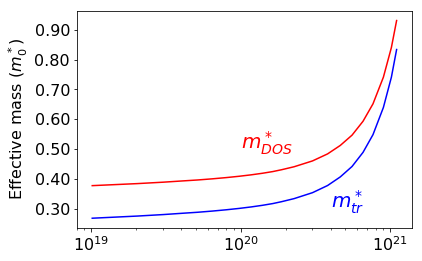

In [361]:
fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot(111)

ax1.set_xticklabels(ax1.get_xticks(), fontsize=16)

listk1r = np.array([k1r[i] for i in [94, 131, 150, 163, 175, 186, 197, 208, 219, 230, 241, 251, 267, 294, 320, 345, 371, 398, 425, 456, 482, 500]])
listk2r = np.array([k2r[i] for i in [33, 46, 53, 58, 62, 66, 70, 74, 78, 82, 86, 90, 96, 106, 116, 126, 136, 147, 158, 171, 182, 190]])
print(listk2r)


me_tr_low = 3 / (1 / me_l(0.00001) + 2 / me_t(0.00001))
me_DOS_low = (me_l(0.00001)*me_t(0.00001)**2)**(1/3.0)


ax1.semilogx(nT(E_l(listk1r)),3.0 / (1.0 / me_l(listk1r) + 2.0 / me_t(listk2r)),'b')
ax1.semilogx(nT(E_l(listk1r)),me_l(listk1r)**(1.0/3.0)*me_t(listk2r)**(2.0/3.0),'r')


#ax1.semilogx([1e17,4.5e18],[me_tr_low,me_tr_low],'r')

#ax1.semilogx(nT(E_t(k1r)),me_t(k1r),'r')
#ax1.semilogx([1e17,4.5e18],[me_DOS_low, me_DOS_low],'r')


#ax1.set_xlim(1e19, 2e21)

#ax1.set_ylim(0, 1.9)


plt.ylabel(r'Effective mass ($m^*_0$)', fontsize=16)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=16)

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


plt.text(4e20, 0.3, r'$m^*_{tr}$', color='b', fontsize=20)
plt.text(1e20, 0.5, r'$m^*_{DOS}$', color='r', fontsize=20)


plt.savefig('m_tr_DOS.png', bbox_inches='tight', format='png', dpi=300)


In [364]:
3.0 / (1.0 / me_l(listk1r) + 2.0 / me_t(listk2r))

array([0.26787847, 0.27509058, 0.28011846, 0.28424271, 0.28787895,
       0.29183432, 0.29612424, 0.3007674 , 0.30578449, 0.31119844,
       0.31703466, 0.32331926, 0.33365961, 0.35363532, 0.37763599,
       0.40653928, 0.441556  , 0.48893427, 0.54840147, 0.63968998,
       0.74142076, 0.83415983])

In [363]:
me_l(listk1r)**(1.0/3.0)*me_t(listk2r)**(2.0/3.0)

array([0.37723436, 0.38405493, 0.38884566, 0.39279327, 0.39626866,
       0.40006765, 0.40419792, 0.40867914, 0.41353301, 0.41878352,
       0.42445714, 0.43057083, 0.44066099, 0.46023474, 0.48380922,
       0.51220348, 0.546747  , 0.59334076, 0.65182196, 0.74133487,
       0.84100227, 0.93147257])

In [362]:
nT(E_l(k1r))[482]

1.0193888175834861e+21

In [358]:
nT(E_t(k1r))[190]

1.1053935022196919e+21

In [133]:
me_l(k1r)[21]

1.4746886516991702

In [136]:
me_t(k2r)[15]

0.21607313257120184

In [135]:
nT(E_t(k2r))[15]

1.02025836810394e+20

In [138]:
me_l = 1.4746886516991702
me_t = 0.21607313257120184
me_DOS = (me_t*me_t*me_l)**(1.0/3.0)
print(me_DOS)
me_c = 3/(1/me_t + 1/me_t + 1/me_l)
print(me_c)

0.409858511279
0.30198602346


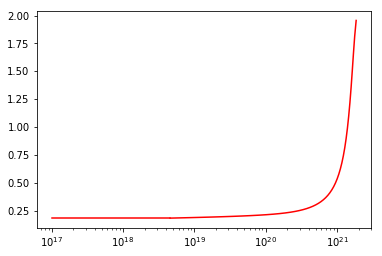

In [179]:
plt.semilogx(nT(E_t(k2r)),me_t(k2r),'r')
plt.semilogx([1e17,4.5e18],[me_t(0.00001),me_t(0.00001)],'r')

In [88]:
eDOS < E

array([], dtype=bool)

In [97]:
eDOS

array([0.056, 0.07 , 0.084, 0.098, 0.112, 0.126, 0.14 , 0.154, 0.168,
       0.182, 0.196, 0.21 , 0.224, 0.238, 0.252, 0.266, 0.28 , 0.294,
       0.308, 0.322, 0.336, 0.35 , 0.364, 0.378, 0.392, 0.406, 0.42 ,
       0.434, 0.448, 0.462, 0.476, 0.49 , 0.504, 0.518, 0.532, 0.546,
       0.56 , 0.574, 0.588, 0.602, 0.616, 0.63 , 0.644, 0.658, 0.672,
       0.686, 0.7  , 0.714, 0.728, 0.742, 0.756, 0.77 , 0.784, 0.798,
       0.812, 0.826, 0.84 , 0.854, 0.868, 0.882, 0.896, 0.91 , 0.924,
       0.938, 0.952, 0.966, 0.98 , 0.994, 1.008, 1.022, 1.036, 1.05 ,
       1.064, 1.078, 1.092, 1.106, 1.12 , 1.134, 1.148, 1.162, 1.176,
       1.19 , 1.204, 1.218, 1.232, 1.246, 1.26 , 1.274, 1.288, 1.302,
       1.316, 1.33 , 1.344, 1.358, 1.372, 1.386, 1.4  , 1.414, 1.428,
       1.442, 1.456, 1.47 , 1.484, 1.498, 1.512, 1.526, 1.54 , 1.554,
       1.568, 1.582, 1.596, 1.61 , 1.624, 1.638, 1.652, 1.666, 1.68 ,
       1.694, 1.708, 1.722, 1.736, 1.75 , 1.764, 1.778, 1.792, 1.806,
       1.82 , 1.834,

In [1]:
me_t

NameError: name 'me_t' is not defined